# Homework #1 - The Linear Model

### General Notes about this assignment 

1. I don't put the **loading datasets code** into a function, because I want to load this [dataset][weblink1] only one time, and use the same one for all the programming tasks
2. The other tasks will be **wrapped into functions** whereever possible.
3. Jupyter notebook _shortcuts key_ for mac can be found [here][weblink2].

[weblink1]: https://ivle.nus.edu.sg/
[weblink2]: https://www.cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/pdf_bw/

### Files included with this submission

List the files in your submission here and provide a short 1 line description of each file.  Make sure your submission's files are named and formatted correctly.


## Programming Exercise 1

In [1]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D as ax
%matplotlib inline
# Plotting with style! 
import seaborn as sb 

# Size the plot appropriately for online display
pl.rcParams['figure.figsize'] = (12.0, 10.0)

Let's fix the random number generator first, in case we need results that are replicable.

In [2]:
nr.seed(3244)

In [3]:
#    Write your solution to the programming assignment here.  We've suggested some cells that you can add 
#    to your notebook as single line comments below.
#    Please place all of your cells to be run in a linear, unintervened order, such that we can automate
#    the running and grading of the assignment.

# load datasets code
ones_for_training = np.zeros((1000,1))+1

dataset = np.loadtxt('hw1-train.dat', dtype=float) # 1000 sets of trainng data
predictors = dataset[:,0:20]
predictors = np.append(ones_for_training, predictors, axis =1)
dependent = dataset[:,20]

ones_for_testing = np.zeros((3000,1))+1

testset = np.loadtxt('hw1-test.dat', dtype=float) # 3000 sets of testing data
test_input = testset[:,0:20]
test_input = np.append(ones_for_testing, test_input, axis =1)
test_output = testset[:,20]

# dataset information : 
    # shape : (1000,21)
    # 20 predictors with 1 dependent variable in the last column
    # predictors and dependent variables have been splitted
    

In [4]:
# LR code - function definition
def lr (xn, yn, w, eta):
    '''
        An implementation of the logistic regression algorithm using gradient descent.
        
        Given points (x,y) with x as a p predictors vector and y in {-1,1}, the logistic regression algorithm
        calculates the gradient vector, use fixed learning rate to do one iteration of it.
        This function minimizes the cross entropy error measure (equivalent to MLE estimation)
        Point wise cross entropy error given by ln[1 + exp(-y(n)*wt*x(n))]
        
        Input: 
            xn : Data points, an Nxp vector. p=r+1
            yn : Classification of the previous data points, an Nx1 column vector. 
                (can take value of only +1 and -1) .
            w  : column vector of parameters inputted, initial (zeros) or from the last iteration.
            eta : the learning rate variable, which controls the step size. 
            
        Output: 
            w : Parameters of the next iteration line indicating parameter for logistic regression.
                This vector is prepared to be enter as the next iteration.
        
        Note:
            we appended a column of 1 to be the first column of the predictors matrix after loading datasets
            
    '''
    
    N = xn.shape[0] # number of training data rows
    p = xn.shape[1] # number of predictors in this traning data set
    gradient_sum = np.zeros((p,1)) # column vector for iteration rolling sum
    
    for i in range (0, N):
        x = xn[i,:].reshape(p,1) # the column of predictors data (transposed to be column vector)
        y = np.asscalar(yn[i]) # the value corresponding to that column (assuming the y vector transposed to 1,N)
        add_value = (y/(1 + np.exp( y * np.matmul(w.transpose(),x) ) )) * x
        gradient_sum += add_value

    return w+eta*(gradient_sum/N)

In [15]:
# LR code - function definition
def in_sample_error (xn, yn, w):
    '''
        An implementation of the out sample error calculation for logistic regression.
        
        Given points (x,y) with x as a p predictors vector and y in {-1,1}, the logistic regression algorithm
        calculates the gradient vector, use fixed learning rate to do one iteration of it.
        This function gives the sample error calculated by cross entropy error
        Point wise cross entropy error given by ln[1 + exp(-y(n)*wt*x(n))]
        
        Input: 
            xn : Test Data points, an Nxp vector. 
            yn : Classification of the previous test data points, an Nx1 column vector. 
                (can take value of only +1 and -1) .
            w  : column vector of parameters inputted, for error evaluation
            
        Output: 
            the sample error calculated by cross entropy
        
        Note:
            
    '''
    N = xn.shape[0] # number of training data rows
    p = xn.shape[1] # number of predictors in this traning data set
    error_sum = 0 # a variable for rolling sum
    
    for i in range (0, N):
        x = xn[i,:].reshape(p,1) # the column of predictors data (transposed to be column vector)
        y = np.asscalar(yn[i]) # the value corresponding to that column (assuming the y vector transposed to 1,N)
        add_value = np.log((1+np.exp(-y*np.matmul(w.transpose(),x))))
        error_sum += add_value 

    return error_sum/N

In [16]:
def out_sample_error (xn, yn, w):
    '''
        An implementation of the out sample error calculation for logistic regression.
        
        Given points (x,y) with x as a p predictors vector and y in {-1,1}, the logistic regression algorithm
        calculates the gradient vector, use fixed learning rate to do one iteration of it.
        This function gives the proportion for wrongly classified data 
        
        Input: 
            xn : Test Data points, an Nxp vector. 
            yn : Classification of the previous test data points, an Nx1 column vector. 
                (can take value of only +1 and -1) .
            w  : column vector of parameters inputted, for error evaluation
            
        Output: 
            the proportion of misclassified data points
        
        Note:
            
    '''
    N = xn.shape[0] # number of training data rows
    p = xn.shape[1] # number of predictors in this test data set, which should remain the same
    error_sum = 0 # a variable for recoding how many misclassified data points so far
    sign = lambda x, w: 1 if np.matmul(w.transpose(),x) > 0 else -1
    is_classified_correctly = lambda x, w, y: True if sign(x, w)==y else False
    
    for i in range (0, N):
        x = xn[i,:].reshape(p,1) # the column of predictors data (transposed to be column vector)
        y = np.asscalar(yn[i]) # the value corresponding to that column (assuming the y vector transposed to 1,N)
        error_sum = error_sum if is_classified_correctly(x,w,y) else (error_sum+1)

    return error_sum/N

In [31]:
def train (xn, yn, w, eta, iteration, test_input, test_output):
    '''
        An implementation of the trainng session with training data
        
        1. take in the training data
        2. get w after iteration round
        3. use test_input and test_output for getting error measurements
        
        Input: 
            xn : Training Data points, an Nxp vector. 
            yn : Classification of the previous training data points, an Nx1 column vector. 
                (can take value of only +1 and -1) .
            w  : column vector of parameters intilized (with zeros)
            iteration : number of iteration for getting weight vector
            test_input : test data for getting error (predictors)
            test_output : test data for getting error (dependen variable)
            
        Output: 
            the weight vector of the result of gradient descent
            the proportion of misclassified data points
        
        Note:
            
    '''
    # training with training data for (iteration) rounds
    p = xn.shape[1]
    w = np.zeros(p).reshape(p,1)
    for _ in range(0, iteration):
        w = lr(xn, yn, w, eta)
    weight_list = w.transpose().tolist()
    print("the training resuls (weight vector) is:")
    print(weight_list)
    
    # find out of in/out sample error from the testing data
    in_error = in_sample_error(xn, yn, w)
    out_error = out_sample_error(test_input, test_output, w)
    print("E(out) for this part = " + str(out_error))

In [32]:
# LR with deterministic gradient descent code - function definition
def deterministic_SGD (xn, yn, w, eta, iteration):
    '''
        An implementation of the logistic regression algorithm using deterministic gradient descent (SGD favoured)
        
        Given points (x,y) with x as a p predictors vector and y in {-1,1}, the logistic regression algorithm
        calculates the gradient vector, use fixed learning rate to do one iteration of it.
        This function minimizes the cross entropy error measure (equivalent to MLE estimation)
        Point wise cross entropy error given by ln[1 + exp(-y(n)*wt*x(n))]
        For this deterministic SGD favoured version, instead of using a batch selection, we select and update weights
        on iterations based on a single point.
        This function still do the required iteration round only (one itration)
        
        Input: 
            xn : Data points, an Nxp vector. 
            yn : Classification of the previous data points, an Nx1 column vector. 
                (can take value of only +1 and -1) .
            w  : column vector of parameters inputted, initial (zeros) or from the last iteration.
            eta : the learning rate variable, which controls the step size. 
            iteration : the number of iteration needed.
            
        Output: 
            w : Parameters of the next iteration line indicating parameter for logistic regression.
                This vector is prepared to be enter as the next iteration.
            out_error : out sample error calculated by the test data
        
        Note:
            
    '''
    N = xn.shape[0] # number of training data rows
    p = xn.shape[1] # number of predictors in this traning data set
    gradient_sum = np.zeros((p,1)) # column vector for iteration rolling sum
    
    for i_iter in range (0, iteration):
        i = i_iter%N # the row of data it is using (index)
        x = xn[i,:].reshape(p,1) # the column of predictors data (transposed to be column vector)
        y = np.asscalar(yn[i]) # the value corresponding to that column (assuming the y vector transposed to 1,N)
        add_value = (y/(1 + np.exp( y * np.matmul(w.transpose(),x) ) )) * x
        w += eta * add_value # update weight vector by single data points optimization
    
    # Print out the final weight vectors
    weight_list = w.transpose().tolist()
    print("the training resuls (weight vector) is:")
    print(weight_list)
    
    # Print out the out sample error using test data
    in_error = in_sample_error(test_input, test_output, w)
    out_error = out_sample_error(test_input, test_output, w)
    print("E(out) for this part = " + str(out_error))
    
    return w

In [33]:
# part a
train(xn=predictors, yn=dependent, w=np.zeros(21).reshape(21,1), eta=0.05, 
     iteration=2333, test_input=test_input, test_output=test_output)

the training resuls (weight vector) is:
[[-0.11619989953257723, -0.6230638861458144, 0.8305469786461497, -1.0934973403011155, 0.055722737804207084, -1.1139138777344821, -0.012965547081638726, 1.1124953425644475, -0.8158812303486358, 0.43092607226431134, 1.4234615491768563, 0.27688543057003007, -0.8809569714738535, -0.5974162096293617, 0.857042250914548, 1.1536100733824346, 1.3039896671074884, -1.3480710066622439, 1.3424348786513611, -0.6163682044354375, -1.1006430680003116]]
E(out) for this part = 0.18433333333333332


In [34]:
# part b
train(xn=predictors, yn=dependent, w=np.zeros(21).reshape(21,1), eta=0.005, 
     iteration=2333, test_input=test_input, test_output=test_output)

the training resuls (weight vector) is:
[[0.006885550310671487, -0.11440970104349155, 0.17133392051185672, -0.2195381778091197, 0.031431981110603226, -0.23767226697862284, 0.018278469662222845, 0.21209126258519118, -0.1624184168038865, 0.08772493345745593, 0.3163116839651878, 0.058027317768233194, -0.15479095606960339, -0.09603835038685485, 0.19544843544259957, 0.2583708726720174, 0.2770753546940755, -0.29100915213236694, 0.2758915978261983, -0.12857103153081947, -0.23006944401723445]]
E(out) for this part = 0.26366666666666666


In [35]:
# part c - 1
part_c_1 = deterministic_SGD (xn=predictors, yn=dependent, w=np.zeros(21).reshape(21,1),
                   eta=0.05, iteration=2333)

the training resuls (weight vector) is:
[[-0.13610500359911665, -0.7150913932415012, 0.8717352150115323, -1.1547142455013581, -0.04543836371080322, -1.1155966476788386, -0.05679034454126234, 1.0837057868511473, -0.9282516677434584, 0.4247163020703133, 1.404405873561479, 0.17829297031538094, -0.7907827543185038, -0.6985461402096794, 0.8544660529869272, 1.1306861114378428, 1.296202206285256, -1.479912060412736, 1.4143478871384088, -0.6600702563762324, -1.0755395024117322]]
E(out) for this part = 0.22266666666666668


In [36]:
# part c - 2
part_c_2 = deterministic_SGD (xn=predictors, yn=dependent, w=np.zeros(21).reshape(21,1),
                   eta=0.005, iteration=2333)

the training resuls (weight vector) is:
[[-0.005875693602769188, -0.13261359159470545, 0.17183769594011658, -0.23245823928057666, -0.001289132173460899, -0.24747490809580588, 0.00454519983057379, 0.2067797826637455, -0.17993032851840576, 0.08439129567952224, 0.3081290631681285, 0.03496957725214285, -0.1455027200314114, -0.1094327715433743, 0.1872677070282472, 0.24725378855802663, 0.2687787882441543, -0.3136832011330745, 0.27764022295336366, -0.1388937393317604, -0.22247117336152533]]
E(out) for this part = 0.19333333333333333


In [37]:
# Firstly, extract the first two dimensions of the predictors - also for later use
N = predictors.shape[0]
# The first column is zero, so we can ignore
predictor_1 = predictors[:,1].reshape(N,1)
predictor_2 = predictors[:,2].reshape(N,1)
predictor_stack = predictors[:,0:3].reshape(N,3)

  g(x)[ 333 ] =  [ 0.6984572] x + [-0.00155755]
  g(x)[ 666 ] =  [ 0.73452403] x + [ 0.05223878]
  g(x)[ 999 ] =  [ 0.74547876] x + [ 0.07848197]
  g(x)[ 1332 ] =  [ 0.74963045] x + [ 0.09741967]
  g(x)[ 1665 ] =  [ 0.75097806] x + [ 0.11316234]
  g(x)[ 1998 ] =  [ 0.75095066] x + [ 0.12710568]
  g(x)[ 2331 ] =  [ 0.75018803] x + [ 0.13987075]


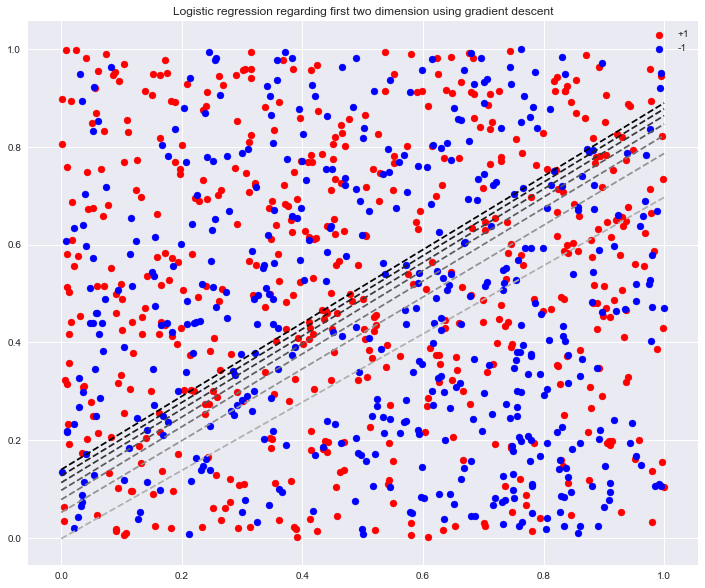

In [44]:
# part d - visualisation - (for part a only)
# Set up the plot initialization
pl.figure();
figa = pl.gca()
red_x = []
red_y = []
blue_x = []
blue_y = []

# Classification Iteration
for i in range(0,N):
    if dependent[i] == +1:
        red_x += [predictor_1[i],]
        red_y += [predictor_2[i],]
    else:
        blue_x += [predictor_1[i],]
        blue_y += [predictor_2[i],]
        
# Process red points
red_number = len(red_x)
red_x=np.asarray(red_x).reshape(1, red_number)
red_y=np.asarray(red_y).reshape(1, red_number)
pl.scatter(red_x, red_y, c='red', label='+1')

# Process blue points
blue_number = len(blue_x)
blue_x=np.asarray(blue_x).reshape(1, blue_number)
blue_y=np.asarray(blue_y).reshape(1, blue_number)
pl.scatter(blue_x, blue_y, c='blue', label='-1')

# Set up the legend of this graph for the labels
this_plot_legend_which_we_never_use = pl.legend(['+1', '-1'], loc = 'best')

# Set up the initial weight vector
w = np.zeros(21).reshape(21,1)

# Set up the x array for line plotting
x = np.linspace(0, 1, 100)

# run lr algorithm 2333 times (with eta equals 0.05)
maxIter = 2333
eta = 0.05
color_intense = .80
for iternumber in range(maxIter):
    w = lr(predictors,dependent,w,eta)
    if (iternumber%333 == 0 and iternumber!=0):
        # Using weights w to compute a,b for a line y=a*x+b
        bnew = -w[0]/w[2]
        anew = -w[1]/w[2]
        g = lambda x: anew * x + bnew
        print ("  g(x)[", iternumber, "] = ", anew, "x +", bnew)
        l = pl.plot(x,g(x),'b--',label=' g(x): iter ' + str(iternumber))
        color_intense -= 0.8/(2333.0/333.0)
        pl.setp(l,color=str(color_intense))
    

pl.title('Logistic regression regarding first two dimension using gradient descent')
pl.show()

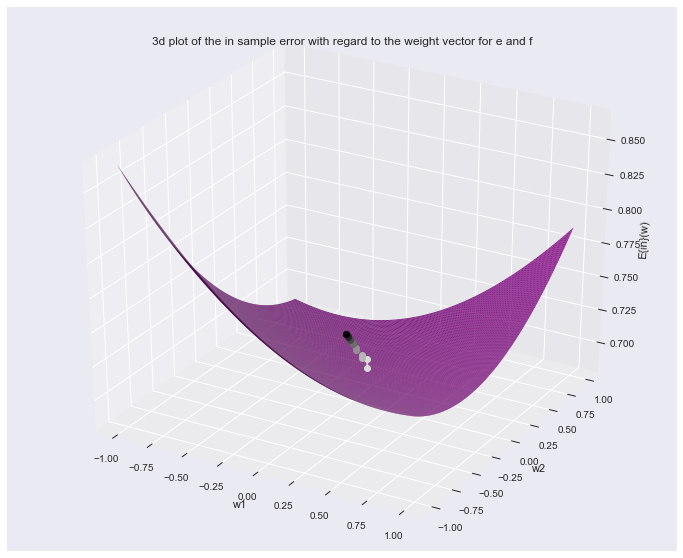

In [257]:
# part - e

# Set up the plot
predictors_2_dim = predictors[:,1:3]
np_grid = np.arange(-1, 1, 0.01)
w_grid = np.meshgrid(np_grid, np_grid)
Z = np.zeros(w_grid[0].shape)

# Set up the sample error value corresponding to all the weight vector combinations
for i in range(w_grid[0].shape[0]):
    for j in range(w_grid[0].shape[1]):
        Z[i,j] = in_sample_error(predictors_2_dim, dependent, 
                                 np.stack((w_grid[0][i,j],w_grid[1][i,j]), axis=-1).reshape(2,1))

# Ploting the surface three dimensionally
fig = pl.figure()
plot_3d = fig.add_subplot(111, projection='3d')    
plot_3d.plot_surface(w_grid[0], w_grid[1], Z, rstride=1, cstride=1, color='purple')

# part - f

# Set up the weight and first in-sample error calculation
w = np.zeros((2,1)).reshape(2,1)
error = in_sample_error(predictors_2_dim, dependent, w)

# Set up the looping details
maxIter = 2333
eta = 0.05
for iternumber in range(0, maxIter):
    last_w = w # Remember the last w
    w = lr(predictors_2_dim, dependent, w, eta) # calculate the new weight vector
    if (iternumber != 0 and iternumber % 333 == 0):
        last_error = error # Remeber the last error
        error = in_sample_error(predictors_2_dim, dependent, w) # calculate the new error
        plot_3d.plot([ np.asscalar(last_w[0]), np.asscalar(w[0]) ],
                    [ np.asscalar(last_w[1]), np.asscalar(w[1]) ],
                    [ np.asscalar(last_error), np.asscalar(error) ],
                    color=str((maxIter-iternumber)/maxIter),
                    marker='o')

# Plot the axis
plot_3d.set_xlabel('w1')
plot_3d.set_ylabel('w2')
plot_3d.set_zlabel('E{in}(w)')
pl.title("3d plot of the in sample error with regard to the weight vector for e and f")

## Essay Questions

_You may choose to do the essay questions here in the .ipynb notebook, but you are welcomed to use a word processor instead and write your solutions there instead (and convert it into .pdf format).  If you do that, please ensure to delete this section._

1\. [LFD Exercise 1.2] Suppose that we use a perceptron to detect spam messages. Let's say that each email messages represented by the frequency of occurrence of keywords, and the output is +1 if the message is considered spam.  

    1. Can you think of some keywords that will end up with a large positive weight into perceptron?  
    2. How about keywords that will get a negative weight?
    3. What parameter in the perceptron directly affects how many borderline messages end up classified as spam?

1. Can you think of some keywords that will end up with a large positive weight into perceptron?  
        Firstly, I would like to understand this question as we want to detect spam messages, and more positive weight vector will contribute more to the +1 output, which corresponds to the event that the message is considered spam. The keywords thus are for spam flagging. The keywords related to a spam message I can think of include the following (with no order in regard to anything): 'Sale', 'Credit_card', 'Don't Wait', 'Never lose this chance', 'Free', 'No charge', 'Free Trail', 'Money Making', so on and so forth. 
        
2. How about keywords that will get a negative weight?
        For keywords that seem to be related to important, not spam, related to business and school work, or personal emails, they should have a negative weight, because they contribute to the event that this message not to be classified as spam message. So some of these kinds of keywords include: 'homework', 'tutorial', 'exam', 'lecture', 'midterm', 'meeting', 'we are pleased to inform you', and so on.

3. What parameter in the perceptron directly affects how many borderline messages end up classified as spam?
        The threshold we take will directly affect, a lof borderline messages are because of the keywords in it can be classified as spam messages but also with some uncertainty. For example, 'sale' may be related to a person's business as he can be a retailer of some commodities. In the case of borderline messages, threshold becomes important. If we set this threshold too small or too big, then some of the good messages will end up being classified as spam, or some of the spam will not be detected. 

2\. Consider a coin tossing experiment.

   1. Given only that the true probability, Θ, satisfies 0 ≤ p ≤ 1, what is a best estimate of Θ?

We denote the probability of heads of this coin as Θ. For any value of Θ, the probability of k heads in n tooses is given by the Bernoulli distribution: Pr(k|Θ, n) = (n choose k)(Θ)<sup>k</sup>(1 - Θ)<sup>n-k</sup>. Say that 100 tosses of the same coin results in heads 70 times and tails 30 times.

   2. Build a model using maximum lilkelihood estimation (MLE) to infer Θ. Which value of Θ is most likely?
   3. Can we judge that this is an unfair coin? Explain your answer.

For a small amount of extra credit, you may add simulations in your Python notebook that support your answers for Problem #2. Make sure to clearly delineate this section if you do this task.

1. Given only that the true probability, Θ, satisfies 0 ≤ p ≤ 1, what is a best estimate of Θ?  
        The best estimate of Θ will be 0.5 as we can best assume coin as fair, which gives the probability of heads as 0.5. As we don't have data, this assumption is the best we can get. 
>We denote the probability of heads of this coin as Θ. For any value of Θ, the probability of k heads in n tooses is given by the Bernoulli distribution: Pr(k|Θ, n) = (n choose k)(Θ)<sup>k</sup>(1 - Θ)<sup>n-k</sup>. Say that 100 tosses of the same coin results in heads 70 times and tails 30 times.
2. Build a model using maximum lilkelihood estimation (MLE) to infer Θ. Which value of Θ is most likely?
        The most likely value of Θ will be 0.7 from a maximum likelihood estimation.  
        We derive this number from MLE as follows:
            1. Find the probability of getting 70 heads in this experiment, which is a function of Θ.
            2. Find the derivative of this probability in regard to Θ.
            3. From FOC in mathematics, we equate this derivative to 0, to get the MLE estimation.


**Mathmematical details**:
d(Pr(k|Θ, n))/dΘ = (n choose k)[70(Θ)<sup>k-1</sup>(1 - Θ)<sup>n-k</sup>-30(Θ)<sup>k</sup>(1 - Θ)<sup>n-k-1</sup>]=0    
                    from which we can simplify to: Θ = k/n
3. Can we judge that this is an unfair coin? Explain your answer.
        Yes and No. 
        
        Yes, because we can tell from this probability and this experiment, and if we think this is already large sample, we can infer that this coin has 0.7 of turning up, which means it is unfair.  
        
        No, because more statistically, we cannot derive anything from an experiment, there is no logical connection. What we can say is, it is not fair during this pass experiment. And we can infer our confidence interval of this coin being fair. From our lecture, we know, Hoeffding's inequality. This experiment only has 100 points, which is error prone, we can be more confident with more precision when using much larger sample.

###### Simulation for coin tossing problems
We want to derive a comfidence interval of this coin being fair but we encounter 70 or more in 100 rounds of experiments

In [8]:
# Simulation code goes here
def test_binomial (p = 0.5, round = 100):
    '''
        Input : p, the probability ranging from 0 to 1, in coin tossing problem, 
                we define a random number from 0 to 1 bigger than p as the event that head comes out.
                
                round, number of rounds for probability computation.
                
        Output: Proportion of this experients of heads coming out
        
        Note:   Every point is drawn from uniform distribution
                
    '''
    
    sum = 0
    for _ in range(round):
        x = np.asscalar(nr.rand(1))
        sum = sum+1 if (x>p) else sum
        
    return sum/round

In [225]:
# Confidence Interval
sum = 0
for _ in range(100):
    if test_binomial(0.5,100) >= 0.7:
        sum += 1
print(sum/100.0)

0.0


>From our simulation above, for a fair coin, it's nearly impossible (tried many times) to get 70 heads out of 100 tosses. As such, we can quite confidently say that this coin in the question has a **very high probability** of being biased. 


3\. In the programming logistic regression, part (c), compare our round-robin version of gradient descent which deterministically uses the next point in turn to perform the gradient descent, versus the standard, stochastic form which chooses a single point at random for an iteration. Describe whether you think this is a good robust idea or not for datasets in general.

        This is not robust and not for datasets in general.
        Firstly, we can say that the round-robin is not random enough. In the stochastic form, we can have the expectation generally in line with the normal gradient descent. The issues with not random enough will be that it may ignore some patterns already exsiting inside the datasets, such as some of the consecutive data rows may be actually related, in this case, some computation becomes not very useful.
        Secondly, we must have enough iterations to cover at least all the points, if we have a huge datasets, this will be impossible and time consuming as compared to the stochastic version. 

## Statement of Individual Work

Please initial (between the square brackets) one of the following statements.

[Dong Shaocong] I, <*A0148008J*>, certify that I have followed the CS 3244 Machine Learning class guidelines for homework assignments.  In particular, I expressly vow that I have followed the Facebook rule in discussing with others in doing the assignment and did not take notes (digital or printed) from the discussions.  
